In [1]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

In [2]:
url = get_db_url("zillow")

sql = """
select * from properties_2017
join predictions_2017 using(parcelid)
left join airconditioningtype using(airconditioningtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid)
where latitude IS NOT NULL
and longitude IS NOT NULL
"""

df = pd.read_sql(sql, url)
df.to_csv("zillow.csv")

In [3]:
df = pd.read_csv("zillow.csv")
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 70 columns):
Unnamed: 0                      77580 non-null int64
typeconstructiontypeid          223 non-null float64
storytypeid                     50 non-null float64
propertylandusetypeid           77580 non-null float64
heatingorsystemtypeid           49572 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        207 non-null float64
airconditioningtypeid           25007 non-null float64
parcelid                        77580 non-null int64
id                              77580 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77580 non-null float64
bedroomcnt                      77580 non-null float64
buildingqualitytypeid           49810 non-null float64
calculatedbathnbr               76964 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        

In [5]:
df.shape

(77580, 70)

In [6]:
# Obtain the counts of all the nulls and sort
null_counts = df.isnull().sum().sort_values(ascending=False)

# What are the half of the columns w/ the most nulls
# series[start:end]
null_counts[:35]

buildingclassdesc           77565
buildingclasstypeid         77565
finishedsquarefeet13        77538
storytypeid                 77530
basementsqft                77530
storydesc                   77530
yardbuildingsqft26          77510
fireplaceflag               77408
architecturalstyledesc      77373
architecturalstyletypeid    77373
typeconstructiondesc        77357
typeconstructiontypeid      77357
finishedsquarefeet6         77194
pooltypeid10                77115
decktypeid                  76966
poolsizesum                 76711
pooltypeid2                 76506
hashottuborspa              76041
yardbuildingsqft17          75187
taxdelinquencyflag          74680
taxdelinquencyyear          74680
finishedsquarefeet15        74553
finishedfloor1squarefeet    71543
finishedsquarefeet50        71543
fireplacecnt                69291
threequarterbathnbr         67474
pooltypeid7                 62501
poolcnt                     61406
numberofstories             59981
airconditionin

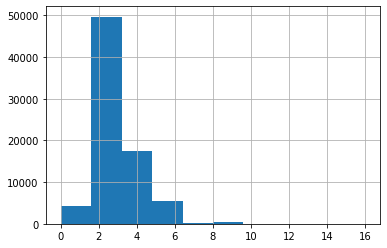

In [7]:
df.bedroomcnt.hist()

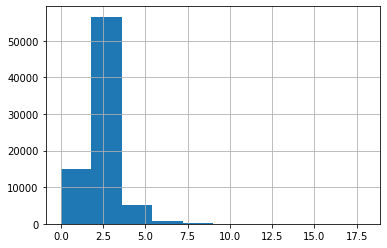

In [8]:
df.bathroomcnt.hist()

In [9]:
# Let's figure out how much data is missing where
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [10]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False, inplace=True)
nulls_by_column.head(30)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77565,0.999807
buildingclasstypeid,77565,0.999807
finishedsquarefeet13,77538,0.999459
storytypeid,77530,0.999356
storydesc,77530,0.999356
basementsqft,77530,0.999356
yardbuildingsqft26,77510,0.999098
fireplaceflag,77408,0.997783
architecturalstyletypeid,77373,0.997332
architecturalstyledesc,77373,0.997332


In [11]:
# Consider the mid-range percent missing columns
nulls_by_column[20:40]

,number_missing_rows,percent_rows_missing
taxdelinquencyyear,74680,0.962619
finishedsquarefeet15,74553,0.960982
finishedfloor1squarefeet,71543,0.922184
finishedsquarefeet50,71543,0.922184
fireplacecnt,69291,0.893155
threequarterbathnbr,67474,0.869734
pooltypeid7,62501,0.805633
poolcnt,61406,0.791518
numberofstories,59981,0.773150
airconditioningtypeid,52573,0.677662


In [12]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing 

null_rows = nulls_by_row(df)
null_rows.sort_values(by="pct_cols_missing", ascending=False, inplace=True)
null_rows

,num_cols_missing,pct_cols_missing,num_rows
25,48,68.57142857142857,3
24,47,67.14285714285714,3
23,46,65.71428571428571,5
22,45,64.28571428571429,50
21,44,62.857142857142854,79
20,43,61.42857142857143,29
19,42,60.0,27
18,41,58.57142857142858,29
17,40,57.14285714285714,230
16,39,55.714285714285715,285


In [13]:
df.columns.tolist()

['Unnamed: 0',
 'typeconstructiontypeid',
 'storytypeid',
 'propertylandusetypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'parcelid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'num

In [14]:
# .isin([collection])
df = df[df.propertylandusetypeid.isin([260, 261, 262, 279])]

In [15]:
# Only retain homes with a positive number of bedrooms and bathrooms
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]
df.shape

(52300, 70)

In [16]:
df.unitcnt.value_counts()

1.0    33783
2.0       28
4.0        3
3.0        1
Name: unitcnt, dtype: int64

In [17]:
# 18485 null unit counts. They're probably unit counts of 1.
df.unitcnt.isnull().sum()

18485

In [18]:
df.unitcnt = df.unitcnt.fillna(1.0)
df.shape

(52300, 70)

In [19]:
# Filter the duplex, triplex, etc...
df = df[df.unitcnt == 1.0]

In [20]:
df.unitcnt.value_counts()

1.0    52268
Name: unitcnt, dtype: int64

In [21]:
# Drop logically unnecessary columns
# Unnamed:0
# id
# id.1
df = df.drop(columns=["Unnamed: 0", "id", "id.1"])

In [22]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,basementsqft,bathroomcnt,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,NaN,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,NaN,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [23]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [24]:
df = handle_missing_values(df)
df.shape

(52268, 33)

In [25]:
df.isnull().sum()

propertylandusetypeid               0
heatingorsystemtypeid           18369
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
propertyzoningdesc              18510
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

In [26]:
# Columns to drop b/c they're ids of descriptions
# propertylandusetypeid
# heatingorsystemtypeid
df = df.drop(columns=["propertylandusetypeid", "heatingorsystemtypeid"])

In [27]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
propertyzoningdesc              18510
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
censustracta

In [28]:
df.heatingorsystemdesc.value_counts(dropna=False)

Central       20723
NaN           18369
Floor/Wall    12542
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [29]:
# b/c these properties are in southern california 
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna("None")

In [30]:
df.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
propertyzoningdesc              18510
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
censustracta

In [31]:
df = df.drop(columns=["propertyzoningdesc"])

In [32]:
df.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
censustractandblock               109
logerror    

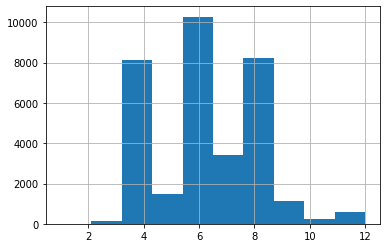

In [33]:
df.buildingqualitytypeid.hist(bins=10)